# Polynomial Regression using Gradient Descent, Least Squares, and Ridge Regression

The point of this workbook is to create a line and add fake noise, then solve for the true line using gradient descent and ridge regression. 

Few changes here from our simple linear regression using gradient descent workbook:
 - Added a few features (squared and 3rd degree polynomials)
 - coefficient updates follow the ridge formulas which can be seen below

Ridge Regression algorithm can be found in Week4 "Approach 2: gradient descent" video.
<img src="img/ridge_algorithm.png">

The only difference I use from the above algorithm is the convergence criteria where I'm looking for a small difference between the current RSS and previous RSS prior to the latest coefficient update.

In Part1 we solve using little to no L2 regularization and in Part2 we turn up the L2 regularization and the hope is we witness smaller coefficients.

## Part 1:

## Create Some Fake Data to Fit

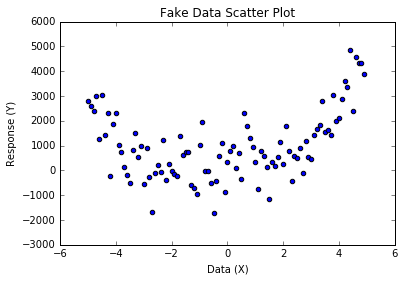

In [1]:
#### CREATE FAKE DATA

# imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# simulate some data
column1 = np.repeat(1, 100)
column2 = np.arange(-5,5,.1)
column3 = column2**2
column4 = column2**3
column5 = column2**4
X = np.matrix([column1,column2,column3,column4,column5])
X = X.transpose()
# make up some parameters
B = np.matrix(np.array([20.345,20.961,15.109,10.432,6.657]))
B = B.transpose()
# create some fake noise
e = np.matrix(np.random.normal(0, 800, 100))
e = e.transpose()
# finally, create fake response data
Y = X*B + e

# plot our fake data to make sure it looks as we would expect (linear relationship with noise)
plt.scatter(X[:,1], Y)
plt.title('Fake Data Scatter Plot')
plt.xlabel("Data (X)")
plt.ylabel("Response (Y)")
plt.show()

## Solve For Coefficients Using Gradient Descent & Least Squares

### First we're going to use a low value for L2 regularization

The estimated Coefficients are:
[[ 1.09611422]
 [ 1.42709495]
 [ 1.49904785]
 [ 7.28419881]
 [ 6.73408498]]
The true Coefficients are:
[[ 20.345]
 [ 20.961]
 [ 15.109]
 [ 10.432]
 [  6.657]]


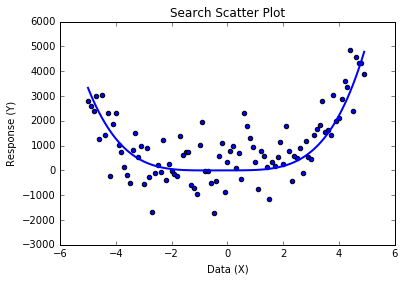

total iterations to convergence:
9929366
total minutes to convergence:
25.9111166676


In [2]:
#### SOLVE FOR COEFFICIENTS USING GRADIENT DESCENT & LEAST SQUARES

import time
t0 = time.time()

# set N = size of dataset
N = X[:,1].size
N = float(N)

# initialize coefficients 
Bhat = np.matrix(np.array([1,1,1,1,1]))
Bhat = Bhat.transpose()
# initialize convergence flag
convergence_flag = 0
# initalize iteration counter
iterations = 0
# Set learning Rate
learning_rate = 0.0000000001
# Set L2 regularization
L2 = 0.1

# convergence_flag == 0
# iterations < 20000000, 4000000
while (convergence_flag == 0):
    iterations = iterations + 1
    # compute RSS   
    residuals = Y-(X*Bhat)
    RS = np.square(residuals)
    RSS = RS.sum()
    # update coefficients:
    # intercept
    residuals = Y-(X*Bhat)
    residual_sum = residuals.sum()
    Bhat_new_0 = Bhat[0,:] + (1/(2*N))*(learning_rate)*(residual_sum)
    # 1st degree
    residual_sum = residuals.transpose()*X[:,1]
    Bhat_new_1 = (1-2*learning_rate*L2)*Bhat[1,:] + (1/(2*N))*(learning_rate)*(residual_sum)
    # 2nd degree
    residual_sum = residuals.transpose()*X[:,2]
    Bhat_new_2 = (1-2*learning_rate*L2)*Bhat[2,:] + (1/(2*N))*(learning_rate)*(residual_sum)    
    # 3rd degree
    residual_sum = residuals.transpose()*X[:,3]
    Bhat_new_3 = (1-2*learning_rate*L2)*Bhat[3,:] + (1/(2*N))*(learning_rate)*(residual_sum)
    # 4rd degree
    residual_sum = residuals.transpose()*X[:,4]
    Bhat_new_4 = (1-2*learning_rate*L2)*Bhat[4,:] + (1/(2*N))*(learning_rate)*(residual_sum)
    # transpose new coefficients
    Bhat_new = np.matrix([Bhat_new_0[0,0],Bhat_new_1[0,0],Bhat_new_2[0,0],Bhat_new_3[0,0],Bhat_new_4[0,0]])
    Bhat_new = Bhat_new.transpose()
    # check for convergence
    # compute RSS   
    residuals = Y-(X*Bhat_new)
    RS = np.square(residuals)
    RSS_new = RS.sum()
    if (abs(RSS_new-RSS)<0.5):
        convergence_flag = 1
    # replace old estimate with the new one
    Bhat = Bhat_new

# print estimated coefficients     
print "The estimated Coefficients are:"
print Bhat
# print true coefficients
print "The true Coefficients are:"
print B

plt.scatter(X[:,1], Y)
plt.plot(X[:,1], X*Bhat, linewidth=2.0)
plt.title('Search Scatter Plot')
plt.xlabel("Data (X)")
plt.ylabel("Response (Y)")
plt.show()

print "total iterations to convergence:"
print iterations

t1 = time.time()
total = t1-t0
print "total minutes to convergence:"
print total/60.0

## Part 2: 

## Solve For Coefficients Using Gradient Descent & Least Squares

### Now we're going to use a larger value for L2 regularization and our new coefficients should be smaller.

The estimated Coefficients are:
[[ 1.07760137]
 [ 0.51983903]
 [ 0.70509144]
 [ 3.17282077]
 [ 6.13626468]]
The true Coefficients are:
[[ 20.345]
 [ 20.961]
 [ 15.109]
 [ 10.432]
 [  6.657]]


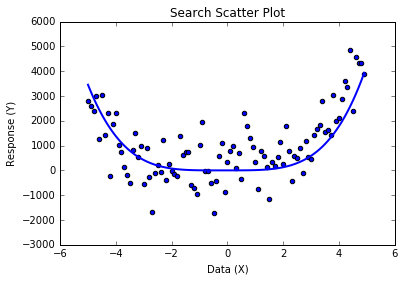

total iterations to convergence:
5477931
total minutes to convergence:
14.2289833347


In [3]:
#### SOLVE FOR COEFFICIENTS USING GRADIENT DESCENT & LEAST SQUARES

import time
t0 = time.time()

# set N = size of dataset
N = X[:,1].size
N = float(N)

# initialize coefficients 
Bhat = np.matrix(np.array([1,1,1,1,1]))
Bhat = Bhat.transpose()
# initialize convergence flag
convergence_flag = 0
# initalize iteration counter
iterations = 0
# Set learning Rate
learning_rate = 0.0000000001
# Set L2 regularization
L2 = 1000

# convergence_flag == 0
# iterations < 20000000, 4000000
while (convergence_flag == 0):
    iterations = iterations + 1
    # compute RSS   
    residuals = Y-(X*Bhat)
    RS = np.square(residuals)
    RSS = RS.sum()
    # update coefficients:
    # intercept
    residuals = Y-(X*Bhat)
    residual_sum = residuals.sum()
    Bhat_new_0 = Bhat[0,:] + (1/(2*N))*(learning_rate)*(residual_sum)
    # 1st degree
    residual_sum = residuals.transpose()*X[:,1]
    Bhat_new_1 = (1-2*learning_rate*L2)*Bhat[1,:] + (1/(2*N))*(learning_rate)*(residual_sum)
    # 2nd degree
    residual_sum = residuals.transpose()*X[:,2]
    Bhat_new_2 = (1-2*learning_rate*L2)*Bhat[2,:] + (1/(2*N))*(learning_rate)*(residual_sum)    
    # 3rd degree
    residual_sum = residuals.transpose()*X[:,3]
    Bhat_new_3 = (1-2*learning_rate*L2)*Bhat[3,:] + (1/(2*N))*(learning_rate)*(residual_sum)
    # 4rd degree
    residual_sum = residuals.transpose()*X[:,4]
    Bhat_new_4 = (1-2*learning_rate*L2)*Bhat[4,:] + (1/(2*N))*(learning_rate)*(residual_sum)
    # transpose new coefficients
    Bhat_new = np.matrix([Bhat_new_0[0,0],Bhat_new_1[0,0],Bhat_new_2[0,0],Bhat_new_3[0,0],Bhat_new_4[0,0]])
    Bhat_new = Bhat_new.transpose()
    # check for convergence
    # compute RSS   
    residuals = Y-(X*Bhat_new)
    RS = np.square(residuals)
    RSS_new = RS.sum()
    if (abs(RSS_new-RSS)<0.5):
        convergence_flag = 1
    # replace old estimate with the new one
    Bhat = Bhat_new

# print estimated coefficients     
print "The estimated Coefficients are:"
print Bhat
# print true coefficients
print "The true Coefficients are:"
print B

plt.scatter(X[:,1], Y)
plt.plot(X[:,1], X*Bhat, linewidth=2.0)
plt.title('Search Scatter Plot')
plt.xlabel("Data (X)")
plt.ylabel("Response (Y)")
plt.show()

print "total iterations to convergence:"
print iterations

t1 = time.time()
total = t1-t0
print "total minutes to convergence:"
print total/60.0

### Our coefficients are smaller!